### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer

c:\Users\msard\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
cust_basket = pd.read_csv('data/customer_basket.csv')
cust_info = pd.read_csv('data/customer_info.csv', index_col=0)

In [3]:
display(cust_basket)
display(cust_basket.info())
display(cust_basket.describe())

,invoice_id,list_of_goods,customer_id
0,7448187,"['olive oil', 'yogurt cake', 'grated cheese', ...",43134
1,3167314,"['babies food', 'shower gel', 'rice', 'black b...",43134
2,10199712,"['babies food', 'barbecue sauce', 'olive oil',...",43134
3,12179179,"['babies food', 'milk', 'rice', 'yogurt cake',...",43134
4,8292388,"['napkins', 'cookies', 'razor', 'cooking oil',...",43134
...,...,...,...
89947,10920856,"['rice', 'pet food', 'cauliflower', 'cake', 'c...",31335
89948,10239983,"['cotton buds', 'cream', 'gums', 'cooking oil'...",35452
89949,10238942,"['cottage cheese', 'champagne', 'spaghetti', '...",3608
89950,6593522,"['chutney', 'samsung galaxy 10', 'catfish', 't...",33063


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89952 entries, 0 to 89951
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   invoice_id     89952 non-null  int64 
 1   list_of_goods  89952 non-null  object
 2   customer_id    89952 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.1+ MB


None

,invoice_id,customer_id
count,8.995200e+04,89952.000000
mean,6.126259e+06,21855.193915
std,3.527265e+06,12610.661213
min,2.006600e+04,1.000000
25%,3.085110e+06,10814.000000
50%,6.133909e+06,21904.000000
75%,9.185876e+06,32771.000000
max,1.224224e+07,43631.000000


In [4]:
display(cust_info)
display(cust_info.info())
display(cust_info.describe())

,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
0,39634,David Frink,male,05/15/1964 10:34 PM,1.0,1.0,1.0,2.0,18306.0,7106.0,...,4056.0,2174.0,3946.0,2514.0,32.0,0.072206,2010.0,NaN,38.735637,-9.149071
1,43460,Belinda Terry,female,03/26/1988 11:06 PM,1.0,0.0,1.0,2.0,5015.0,1334.0,...,1925.0,2115.0,1028.0,1987.0,2566.0,0.206227,2014.0,NaN,38.762702,-9.160802
2,23937,Evelyn Calico,female,04/13/1969 06:07 PM,0.0,1.0,1.0,3.0,3097.0,4073.0,...,2347.0,1306.0,1504.0,2018.0,1282.0,0.136168,2009.0,951127.0,38.717431,-9.165105
3,2431,Ora Boggess,female,06/15/1941 03:26 AM,0.0,0.0,0.0,1.0,10825.0,207.0,...,151.0,53.0,0.0,4135.0,70.0,0.215852,2007.0,958680.0,38.782169,-9.150318
4,10090,Lonnie Hopson,male,12/18/2001 03:03 AM,0.0,0.0,0.0,1.0,697.0,570.0,...,172.0,587.0,223.0,64.0,4.0,0.181023,2024.0,977059.0,38.770397,-9.177024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43626,48487,Amelia Crawford,female,08/28/1983 11:43 AM,1.0,1.0,0.0,1.0,7189.0,6293.0,...,3779.0,1748.0,4387.0,2812.0,14.0,0.233259,2016.0,NaN,38.760694,-9.166146
43627,24856,Silvia Ramos,female,09/21/1992 07:16 PM,1.0,1.0,1.0,1.0,11238.0,11490.0,...,3893.0,1621.0,3831.0,2726.0,25.0,0.060977,2014.0,909859.0,38.760280,-9.166643
43628,21373,Addie Coronel,female,02/20/1994 05:58 AM,0.0,0.0,0.0,1.0,6059.0,241.0,...,142.0,179.0,0.0,11242.0,44.0,0.097672,2017.0,NaN,38.769923,-9.181550
43629,19527,Msc. Mary Ross,female,08/06/1989 04:39 PM,1.0,0.0,1.0,1.0,3098.0,425.0,...,0.0,393.0,210.0,422.0,178.0,0.182188,2007.0,933102.0,38.760889,-9.174663


<class 'pandas.core.frame.DataFrame'>
Index: 43631 entries, 0 to 43630
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_id                              43631 non-null  int64  
 1   customer_name                            43631 non-null  object 
 2   customer_gender                          43631 non-null  object 
 3   customer_birthdate                       43631 non-null  object 
 4   kids_home                                43107 non-null  float64
 5   teens_home                               42610 non-null  float64
 6   number_complaints                        42977 non-null  float64
 7   distinct_stores_visited                  42322 non-null  float64
 8   lifetime_spend_groceries                 43631 non-null  float64
 9   lifetime_spend_electronics               43631 non-null  float64
 10  typical_hour                             41886 non-

None

,customer_id,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude
count,43631.000000,43107.000000,42610.000000,42977.000000,42322.000000,43631.000000,43631.000000,41886.000000,42758.000000,43631.000000,...,42322.000000,43631.000000,43631.000000,43631.000000,43631.000000,43631.000000,43631.000000,24654.000000,43631.000000,43631.000000
mean,24993.120877,1.081263,0.847829,0.705726,1.669959,5600.030047,2000.058468,13.520580,456.893938,443.636657,...,1471.423846,916.948408,990.334922,2023.225619,387.260182,0.229431,2011.342257,949808.661069,38.752266,-9.158591
std,14426.310863,1.239257,0.840397,0.624624,1.034825,4602.647746,3004.924537,4.558057,312.832282,210.313287,...,3910.163766,729.744050,1241.658577,2926.355387,411.436756,0.189242,4.656129,28894.251301,0.048629,0.036606
min,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,6.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.477986,1996.000000,900008.000000,38.690636,-9.418076
25%,12521.500000,0.000000,0.000000,0.000000,1.000000,2184.500000,218.000000,10.000000,227.000000,297.000000,...,187.000000,372.000000,204.000000,517.000000,97.000000,0.111704,2008.000000,924774.000000,38.732481,-9.175824
50%,24988.000000,1.000000,1.000000,1.000000,1.000000,4071.000000,574.000000,13.000000,387.000000,419.000000,...,641.000000,668.000000,557.000000,874.000000,252.000000,0.205235,2011.000000,949681.000000,38.748887,-9.160152
75%,37484.500000,1.000000,1.000000,1.000000,2.000000,6605.500000,2565.500000,17.000000,584.000000,560.000000,...,1570.000000,1437.000000,1111.000000,2217.000000,537.000000,0.310884,2014.000000,975117.250000,38.764504,-9.139240
max,50000.000000,9.000000,6.000000,9.000000,8.000000,26552.000000,21273.000000,24.000000,2112.000000,2224.000000,...,50381.000000,3487.000000,5389.000000,19596.000000,3544.000000,1.196858,2024.000000,999996.000000,39.357600,-9.055377


In [5]:
cust_info.describe(include=object)

,customer_name,customer_gender,customer_birthdate
count,43631,43631,43631
unique,42351,2,43594
top,James Brown,female,08/13/1962 08:48 PM
freq,10,21910,2


### Visualizations

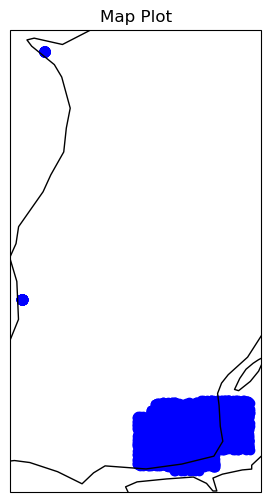

In [6]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a new figure
plt.figure(figsize=(10, 6))

# Create a Cartopy map with PlateCarree projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Scatter plot of latitude and longitude
ax.scatter(cust_info['longitude'], cust_info['latitude'], color='blue', marker='o', transform=ccrs.PlateCarree())

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Map Plot')

plt.show()

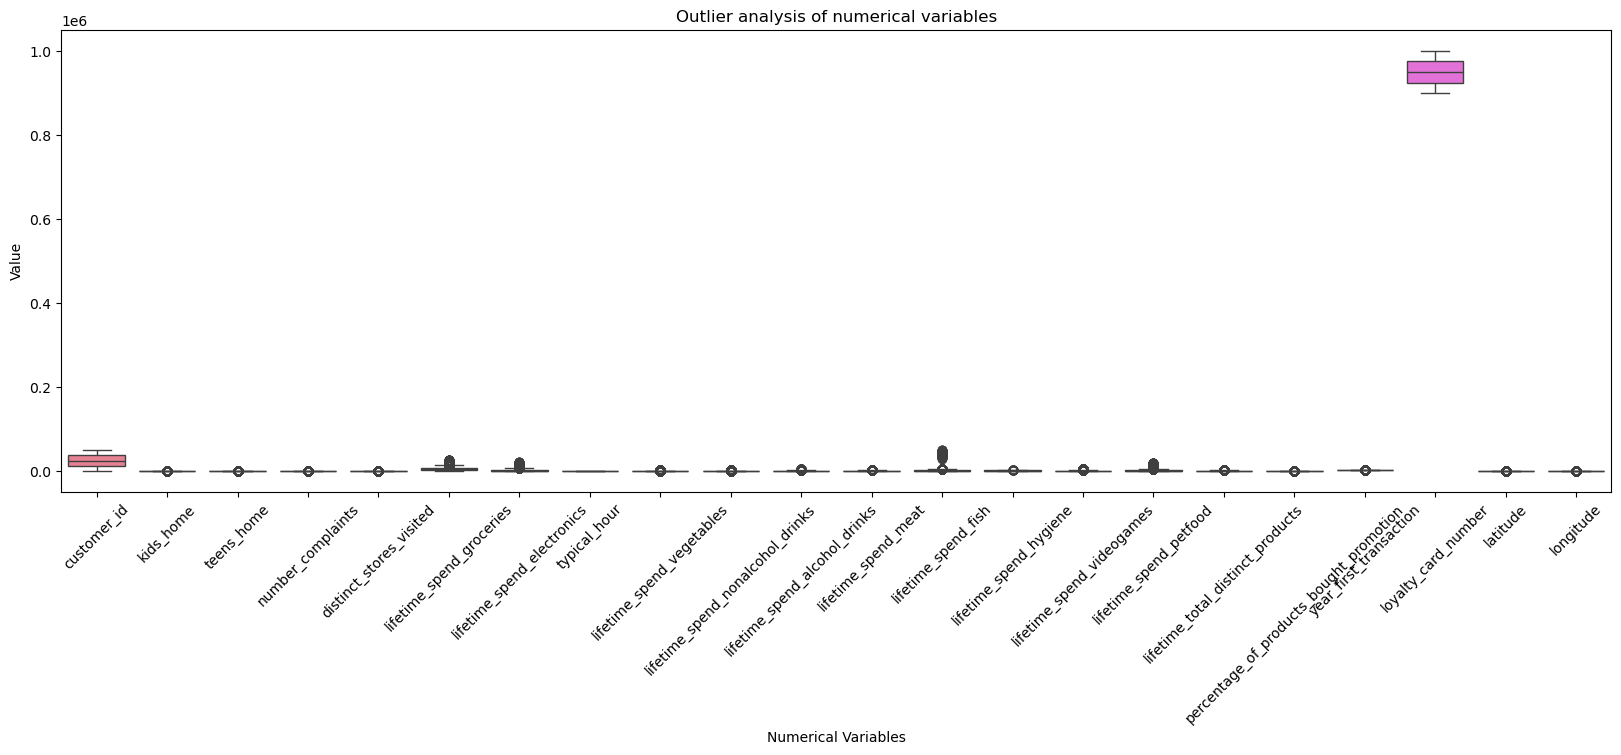

In [7]:
# Checking for outliers
plt.figure(figsize=(20,6))
sns.boxplot(data=cust_info)
plt.xticks(rotation=45)
plt.xlabel('Numerical Variables')
plt.ylabel('Value')
plt.title('Outlier analysis of numerical variables')
plt.show()

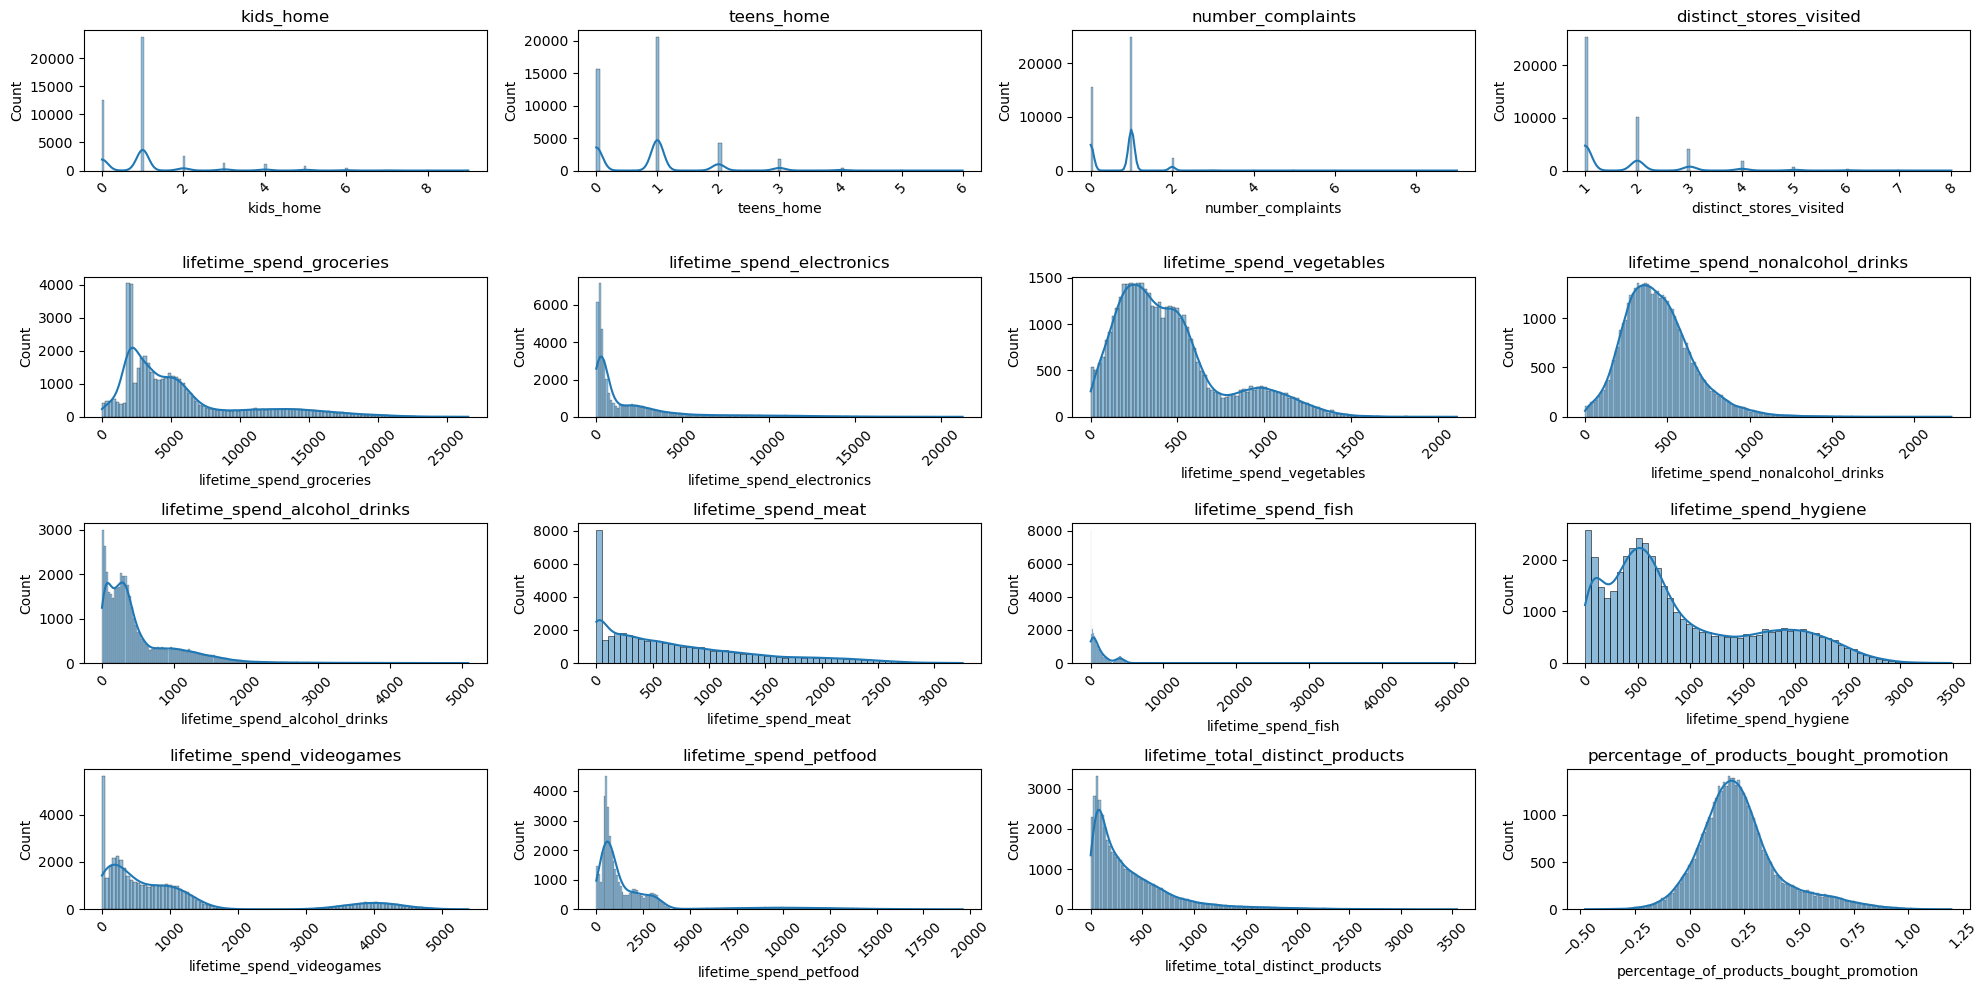

In [8]:
# Plotting
plt.figure(figsize=(20, 10))  # Increase figure size

# Define the number of rows and columns for subplots
num_rows = 4
num_cols = 4

# Loop through each column in the DataFrame and create subplots
for i, column in enumerate(['kids_home', 'teens_home', 'number_complaints',
                            'distinct_stores_visited', 'lifetime_spend_groceries',
                            'lifetime_spend_electronics', 'lifetime_spend_vegetables',
                            'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
                            'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
                            'lifetime_spend_videogames', 'lifetime_spend_petfood',
                            'lifetime_total_distinct_products', 'percentage_of_products_bought_promotion']):
    plt.subplot(num_rows, num_cols, i+1)
    sns.histplot(cust_info[column], kde=True)  # Histogram with Kernel Density Estimate
    plt.title(column)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()  # Adjust layout automatically
plt.show()


## Preprocessing

### Missing values

In [6]:
def nulls_to_bool(df:pd.DataFrame, col_names:list) -> pd.DataFrame:
    '''
    Function that creates a new column for each column mentioned
    With the null values replaced with 0 and the non-null with 1
    Inputs: df (dataframe)
            col_names (list of strings) - columns to treat
    Output: df (dataframe) - altered dataframe
    '''

    for col in col_names:
        df[col + '_bool'] = df[col].notnull()

    return df

In [32]:
def knn_imputing(df:pd.DataFrame) -> pd.DataFrame:
    df_numeric = df.select_dtypes(include='number')
    indices = df_numeric.index
    
    # Fit and transform the imputer on the dataset
    # We use distance because the dataset has outliers
    imputer = KNNImputer(weights='distance', n_neighbors=20).fit(df_numeric)
    df_numeric_imputed = pd.DataFrame(imputer.transform(df_numeric), columns=df_numeric.columns, index=indices)

    # Add together the non-numerical original columns and the newly imputed ones
    df_imputed = pd.concat([df.drop(columns=df_numeric.columns), df_numeric_imputed], axis=1)

    return df_imputed

In [33]:
knn_imputing(cust_info).info()

c:\Users\msard\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\msard\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


<class 'pandas.core.frame.DataFrame'>
Index: 43631 entries, 0 to 43630
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customer_name                            43631 non-null  object 
 1   customer_gender                          43631 non-null  object 
 2   customer_birthdate                       43631 non-null  object 
 3   loyalty_card                             43631 non-null  bool   
 4   customer_id                              43631 non-null  float64
 5   kids_home                                43631 non-null  float64
 6   teens_home                               43631 non-null  float64
 7   number_complaints                        43631 non-null  float64
 8   distinct_stores_visited                  43631 non-null  float64
 9   lifetime_spend_groceries                 43631 non-null  float64
 10  lifetime_spend_electronics               43631 non-

### Datatypes

In [34]:
def float64_columns(df:pd.DataFrame) -> list:
    '''
    Function to return a list of column names with datatype 'float64' in a dataframe
    Inputs: df (dataframe)
    Output: float64_cols (list of strings) - column names with datatype 'float64'
    '''
    float64_cols = df.select_dtypes(include=['float64']).columns.tolist()
    return float64_cols

In [35]:
def float_converter(df:pd.DataFrame, variable_list:list) -> pd.DataFrame:
    '''
    Function to convert float columns in a DataFrame to more memory-efficient float types
    Inputs: df (dataframe)
            variable_list (list of strings) - names of specific columns in the DataFrame
    Output: DataFrame with columns converted to more memory-efficient float data types
    '''
    for var in variable_list:
        # Finds the minimum and maximum values in the column
        min_val = df[var].min(skipna=True)
        max_val = df[var].max(skipna=True)

        # Determine the appropriate float type based on the range of values
        float16_max = np.finfo('float16').max
        float32_max = np.finfo('float32').max
        
        if min_val > -float16_max and max_val < float16_max:
            df[var] = df[var].astype('float16')
        elif min_val > -float32_max and max_val < float32_max:
            df[var] = df[var].astype('float32')

    return df

In [36]:
def gender_coder(df:pd.DataFrame, gender_col:str) -> pd.DataFrame:
    '''
    Function that takes a gender column and changes "male" to 0 and "female" to 1
    Input:  df (dataframe)
            gender_col (string) - name of the gender column
    Output: df (dataframe) - altered dataframe
    '''
    df[gender_col] = np.where(df[gender_col] == "male", 0, 1)
    df = df.astype({gender_col : "bool"})
    return df

In [37]:
def datetime_converter(df: pd.DataFrame, datetime_cols: list) -> pd.DataFrame:
    '''
    Function that changes the dtype of the listed columns to datetime
    Input:  df (dataframe)
            datetime_cols (list of strings) - name of the datetime columns
    Output: df (dataframe) - altered dataframe
    '''
    for col in datetime_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

In [38]:
def preproc_applier(df:pd.DataFrame, datetime_cols:list=None, gender_col:str=None) -> pd.DataFrame:
    '''
    Function that applies preprocessing functions to a dataframe
    Input:  df (dataframe)
            datetime_cols (list of strings) - column names to change to datetime
            gender_col (string) - name of the gender column
    Output: df (dataframe) - altered dataframe
    '''
    df = datetime_converter(df, datetime_cols)
    float64_cols = float64_columns(df)
    df = float_converter(df, float64_cols)
    df = gender_coder(df, gender_col)
    
    return df

C:\Users\msard\AppData\Local\Temp\ipykernel_10236\277112145.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors='coerce')


### Normalization / Standerdization

In [39]:
# Apply robust scaler 


In [40]:
# Addressing skewness ( log transformation)

### Feature Engineering

In [ ]:
# Transform features into more suitable for clustering

In [43]:
cust_info_treated['vegetarian'] = np.where((cust_info_treated['lifetime_spend_meat'] == 0) & 
                                           (cust_info_treated['lifetime_spend_fish'] == 0), 
                                           1, 0)

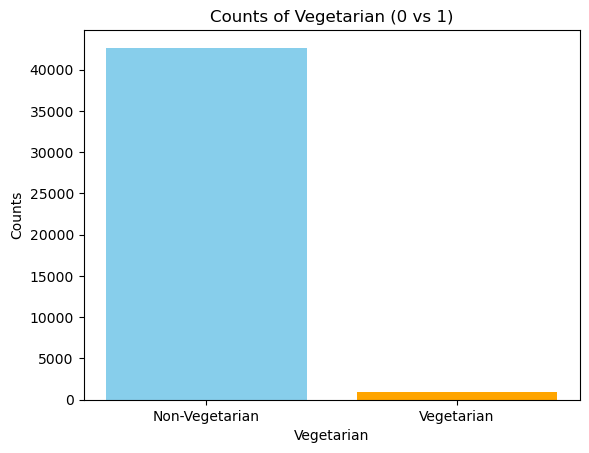

In [46]:
# Count the occurrences of each value in the 'vegetarian' column
vegetarian_counts = cust_info_treated['vegetarian'].value_counts()

# Plot the counts
plt.bar(vegetarian_counts.index, vegetarian_counts.values, color=['skyblue', 'orange'])

# Add labels and title
plt.xlabel('Vegetarian')
plt.ylabel('Counts')
plt.title('Counts of Vegetarian (0 vs 1)')
plt.xticks(vegetarian_counts.index, ['Non-Vegetarian', 'Vegetarian'])

# Show plot
plt.show()

In [41]:
def extract_education(name):
    if 'Msc.' in name:
        return 'Msc.'
    elif 'Bsc.' in name:
        return 'Bsc.'
    else:
        return None

# Apply the function to create a new 'Education' column
cust_info_treated['education'] = cust_info_treated['customer_name'].apply(extract_education)

# Extract the first name and last name
cust_info_treated['name'] = cust_info_treated['customer_name'].str.replace('Msc.|Bsc.', '').str.strip()

cust_info_treated

,customer_id,customer_name,customer_gender,customer_birthdate,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,...,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,loyalty_card,education,name
0,39634,David Frink,0,1964-05-15 22:34:00,1.0,1.0,1.0,2.0,18304.0,7104.0,...,2514.0,32.0,0.072205,1970-01-01 00:00:00.000002010,NaN,38.75000,-9.148438,False,None,David Frink
1,43460,Belinda Terry,1,1988-03-26 23:06:00,1.0,0.0,1.0,2.0,5016.0,1334.0,...,1987.0,2566.0,0.206177,1970-01-01 00:00:00.000002014,NaN,38.75000,-9.164062,False,None,Belinda Terry
2,23937,Evelyn Calico,1,1969-04-13 18:07:00,0.0,1.0,1.0,3.0,3096.0,4072.0,...,2018.0,1282.0,0.136108,1970-01-01 00:00:00.000002009,951127.0,38.71875,-9.164062,True,None,Evelyn Calico
3,2431,Ora Boggess,1,1941-06-15 03:26:00,0.0,0.0,0.0,1.0,10824.0,207.0,...,4136.0,70.0,0.215820,1970-01-01 00:00:00.000002007,958680.0,38.78125,-9.148438,True,None,Ora Boggess
4,10090,Lonnie Hopson,0,2001-12-18 03:03:00,0.0,0.0,0.0,1.0,697.0,570.0,...,64.0,4.0,0.181030,1970-01-01 00:00:00.000002024,977059.0,38.78125,-9.179688,True,None,Lonnie Hopson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43626,48487,Amelia Crawford,1,1983-08-28 11:43:00,1.0,1.0,0.0,1.0,7188.0,6292.0,...,2812.0,14.0,0.233276,1970-01-01 00:00:00.000002016,NaN,38.75000,-9.164062,False,None,Amelia Crawford
43627,24856,Silvia Ramos,1,1992-09-21 19:16:00,1.0,1.0,1.0,1.0,11240.0,11488.0,...,2726.0,25.0,0.060974,1970-01-01 00:00:00.000002014,909859.0,38.75000,-9.164062,True,None,Silvia Ramos
43628,21373,Addie Coronel,1,1994-02-20 05:58:00,0.0,0.0,0.0,1.0,6060.0,241.0,...,11240.0,44.0,0.097656,1970-01-01 00:00:00.000002017,NaN,38.78125,-9.179688,False,None,Addie Coronel
43629,19527,Msc. Mary Ross,1,1989-08-06 16:39:00,1.0,0.0,1.0,1.0,3098.0,425.0,...,422.0,178.0,0.182129,1970-01-01 00:00:00.000002007,933102.0,38.75000,-9.171875,True,Msc.,Msc. Mary Ross


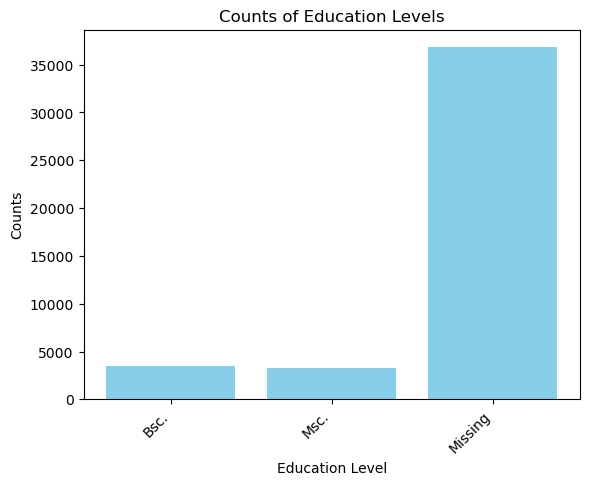

In [48]:
# Count the occurrences of each value in the 'Education' column
education_counts = cust_info_treated['education'].value_counts()

# Count the missing values in the 'Education' column
missing_values_count = cust_info_treated['education'].isnull().sum()

# Add the count of missing values as a new entry in the 'education_counts' Series
education_counts['Missing'] = missing_values_count

# Plot the counts
plt.bar(education_counts.index, education_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Education Level')
plt.ylabel('Counts')
plt.title('Counts of Education Levels')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show plot
plt.show()

### Feature Selection

In [ ]:
def variable_correlation(df: pd.DataFrame, threshold: float = 0.7) -> list:
    # Generates the correlation matrix
    correlation_matrix = df.drop(['customer_name','typical_hour','year_first_transaction','customer_gender', 'customer_birthdate'], axis=1).corr()
    
    # Creates a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()

    # Finds highly correlated variables (below -0.7 or above 0.7, not including)
    correlated_vars = list()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname_i = correlation_matrix.columns[i]
                colname_j = correlation_matrix.columns[j]
                correlated_vars.append(colname_i)
                correlated_vars.append(colname_j)
                correlated_vars.append(' / ')

    print('Highly correlated variables: ', correlated_vars)

In [ ]:
variable_correlation(cust_info)

Highly correlated variables:
- 'lifetime_spend_meat', 'lifetime_spend_electronics'
- 'lifetime_spend_hygiene', 'lifetime_spend_meat'
- 'lifetime_spend_videogames', 'lifetime_spend_electronics'
- 'lifetime_spend_videogames', 'lifetime_spend_meat'
- 'latitude', 'lifetime_spend_fish'

So we should remove 'lifetime_spend_meat' and 'lifetime_spend_videogames'

In [ ]:
# Reducing dimensionality
# - Principal Component Analysis
# - t-distributed Stochastic Neighbor Embedding (t-SNE)